In [ ]:
# source colab : https://colab.research.google.com/drive/1BW74vYeUyQfo7_AoB8M8aVu74_H-jTKK#scrollTo=gShFJrDzzvwW&uniqifier=1
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


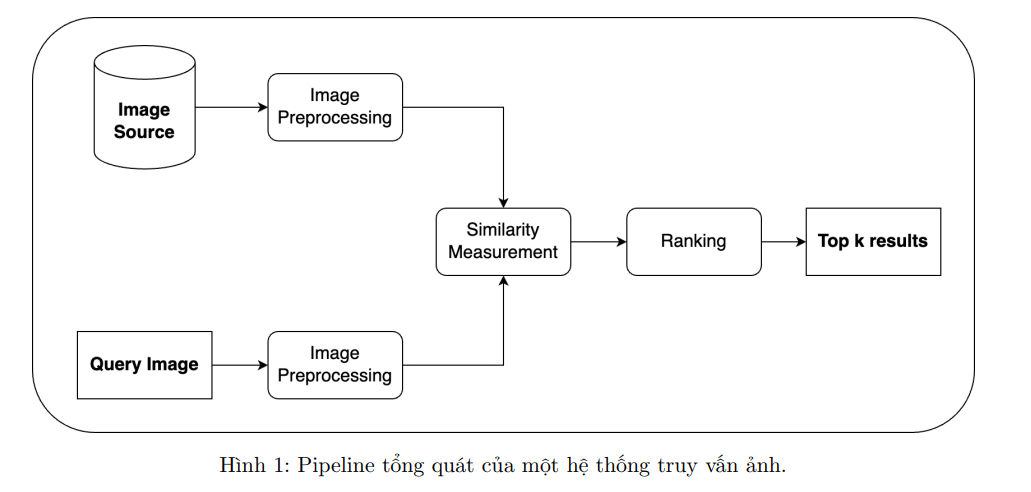

In [ ]:
!gdown 1Q0quEfLdfBYv9pJ8LJtmCGTizKr2jG-Z

Downloading...
From: https://drive.google.com/uc?id=1Q0quEfLdfBYv9pJ8LJtmCGTizKr2jG-Z
To: /content/image_retrieval_dataset.zip
100% 36.5M/36.5M [00:00<00:00, 87.6MB/s]


In [ ]:
!unzip image_retrieval_dataset.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: images_mr/5415.jpg      
  inflating: images_mr/5416.jpg      
  inflating: images_mr/5417.jpg      
  inflating: images_mr/5418.jpg      
  inflating: images_mr/5419.jpg      
  inflating: images_mr/542.jpg       
  inflating: images_mr/5420.jpg      
  inflating: images_mr/5421.jpg      
  inflating: images_mr/5422.jpg      
  inflating: images_mr/5423.jpg      
  inflating: images_mr/5424.jpg      
  inflating: images_mr/5425.jpg      
  inflating: images_mr/5426.jpg      
  inflating: images_mr/5427.jpg      
  inflating: images_mr/5428.jpg      
  inflating: images_mr/5429.jpg      
  inflating: images_mr/543.jpg       
  inflating: images_mr/5430.jpg      
  inflating: images_mr/5431.jpg      
  inflating: images_mr/5432.jpg      
  inflating: images_mr/5433.jpg      
  inflating: images_mr/5434.jpg      
  inflating: images_mr/5435.jpg      
  inflating: images_mr/5436.jpg      
  inflating: images_mr/5437.jpg

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [ ]:
dataset_dir = 'images_mr'
image_filenames = os.listdir( dataset_dir )
print(len(image_filenames))
src_images = []
for filename in image_filenames :
  filepath = os.path.join (
    dataset_dir , filename
  )
  image = cv2.imread(filepath)
  image = cv2.cvtColor(
    image , cv2.COLOR_BGR2RGB
  )
  src_images.append(image)

9908


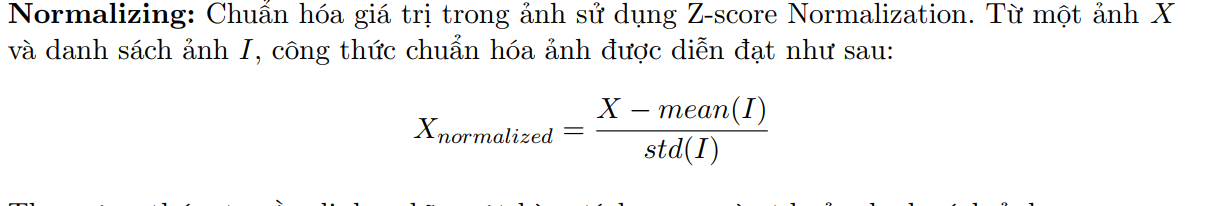

### Image Preprocessing

In [ ]:
def image_resize(images, target_size = (64,64)):
  resized_image = cv2.resize(images,target_size)
  return resized_image

def calculate_mean_std ( images ):
  mean = np.mean(images , axis =(0 , 1, 2))
  std = np.std(images , axis =(0 , 1, 2))
  return mean , std
def image_std_normalize (images , mean , std):
  normalized_image = ( images - mean ) / std
  return normalized_image
def image_flatten(images , is_batch = False ):
  if is_batch :
      flattened_image = images.reshape ( images.shape[0] , -1)
  else :
      flattened_image = images.reshape ( -1)

  return flattened_image


In [ ]:
# preprocessing for images
def preprocess_batches ( images ):
  resized_images = [
   image_resize(image) for image in src_images
  ]
  images_arr = np.array( resized_images )
  print('image_resize.shape: ',images_arr.shape)
  mean , std = calculate_mean_std( images_arr )
  normalized_images = image_std_normalize (
    images_arr ,
    mean , std
  )
  flattened_images = image_flatten(
    normalized_images ,
    is_batch = True
  )

  return flattened_images , mean , std

In [ ]:
# preprocessing for querry image
def preprocess_query ( image,mean,std ):
  resized_image = image_resize ( image )
  normalized_image = image_std_normalize (
    resized_image ,
    mean,
    std
  )
  flattened_image = image_flatten ( normalized_image )

  return flattened_image

### Similarity measurement

In [ ]:
def mean_absolute_error ( query_vector , src_vectors ):
  abs_diff = np. abs( src_vectors - query_vector )
  mae = np. mean ( abs_diff , axis =1)
  return mae

def mean_squared_error ( query_vector , src_vectors ):
  squared_diff = ( src_vectors - query_vector ) ** 2
  mse = np. mean ( squared_diff , axis =1)
  return mse

def cosine_similarity ( query_vector , src_vectors ):
  query_norm       = np.linalg.norm( query_vector )
  normalized_query = query_vector / query_norm
  src_norms        = np.linalg.norm ( src_vectors , axis =1)
  normalized_src   = src_vectors / src_norms [:, np. newaxis ]
  cosine_similarity = np.dot(normalized_src , normalized_query )
  return cosine_similarity

def correlation_coefficient ( query_vector , src_vectors ):
  return np.corrcoef( query_vector , src_vectors )[:-1, -1]


### Ranking

In [ ]:
def ranking ( preprocessed_query_image , preprocessed_src_images , top_k =10) :
  scores = cosine_similarity (
    preprocessed_query_image ,
    preprocessed_src_images
  )
  ranked_list = np.argsort(scores)[:: -1][: top_k ]
  scores = scores[ranked_list ]

  return ranked_list , scores

image_resize.shape:  (9908, 64, 64, 3)
Query Image


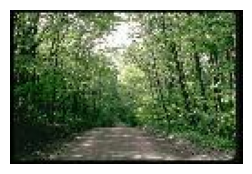

Top 4 results 


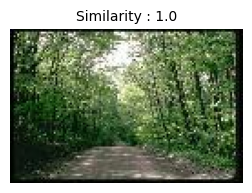

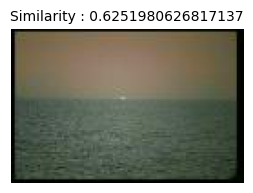

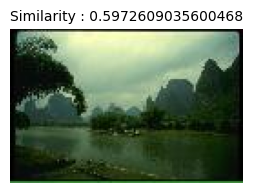

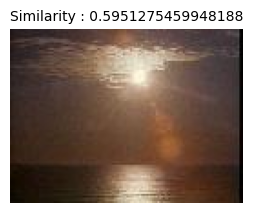

In [ ]:
query_image_paths = [
  '/content/images_mr/1885.jpg'
]
top_k =4
preprocessed_src_images,mean,std = preprocess_batches(src_images)
for query_image_path in query_image_paths :
  query_image = cv2. imread ( query_image_path , 1)
  query_image = cv2. cvtColor ( query_image , cv2.COLOR_BGR2RGB )
  preprocessed_query_image = preprocess_query ( query_image,mean,std )

  ranked_list , scores = ranking (
  preprocessed_query_image ,
  preprocessed_src_images ,
  top_k
  )
  print('Query Image')
  plt.figure( figsize =(3 , 3))
  plt.imshow( query_image )
  plt.axis('off')
  plt.show()
  print(f'Top { top_k } results ')
  for idx in range (len( ranked_list )):
    src_image_idx = ranked_list [idx]
    similarity_score = scores [idx]
    plt.figure( figsize =(3 , 3))
    plt.imshow( src_images [ src_image_idx ])
    plt.title(f'Similarity : { similarity_score }', fontsize =10)
    plt.axis('off')
    plt.show()

In [ ]:
a = np.array([[4,7],[9,3]])
print(a)
print(a.shape)
print(a.reshape(-1))

[[4 7]
 [9 3]]
(2, 2)
[4 7 9 3]


In [ ]:
scores = [0.4, 0.2, 0.1, 0.7, 0.9]
print(scores[::-1])

[0.9, 0.7, 0.1, 0.2, 0.4]


In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])
print(a.shape)
a= a[:,:,np.newaxis]
print(a.shape)

(2, 3)
(2, 3, 1)
